In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df = pd.read_csv('diabetes.csv')

#***EDA***

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

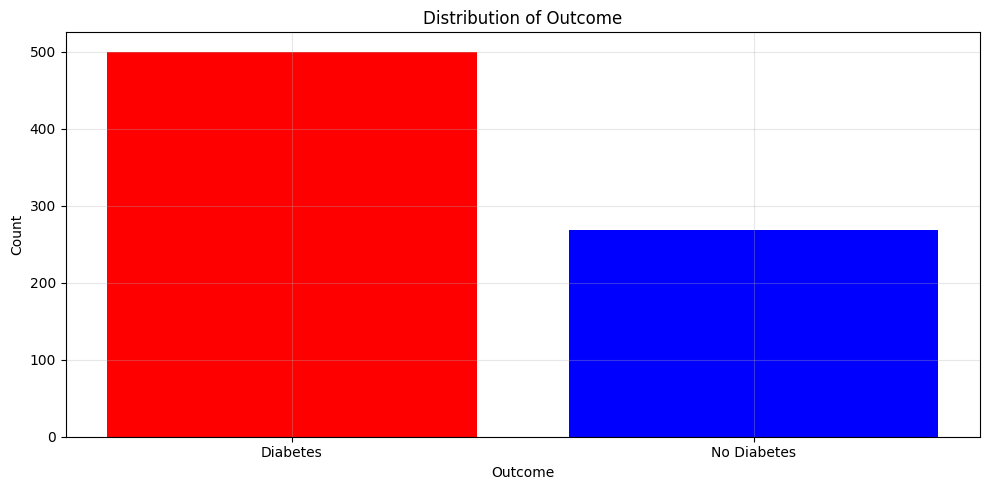

In [ ]:
# Data is clean no null nor duplicated values
# How many patients have Diabetes ?
counts = df['Outcome'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts.values, color=['red', 'blue'],
        tick_label=['Diabetes', 'No Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

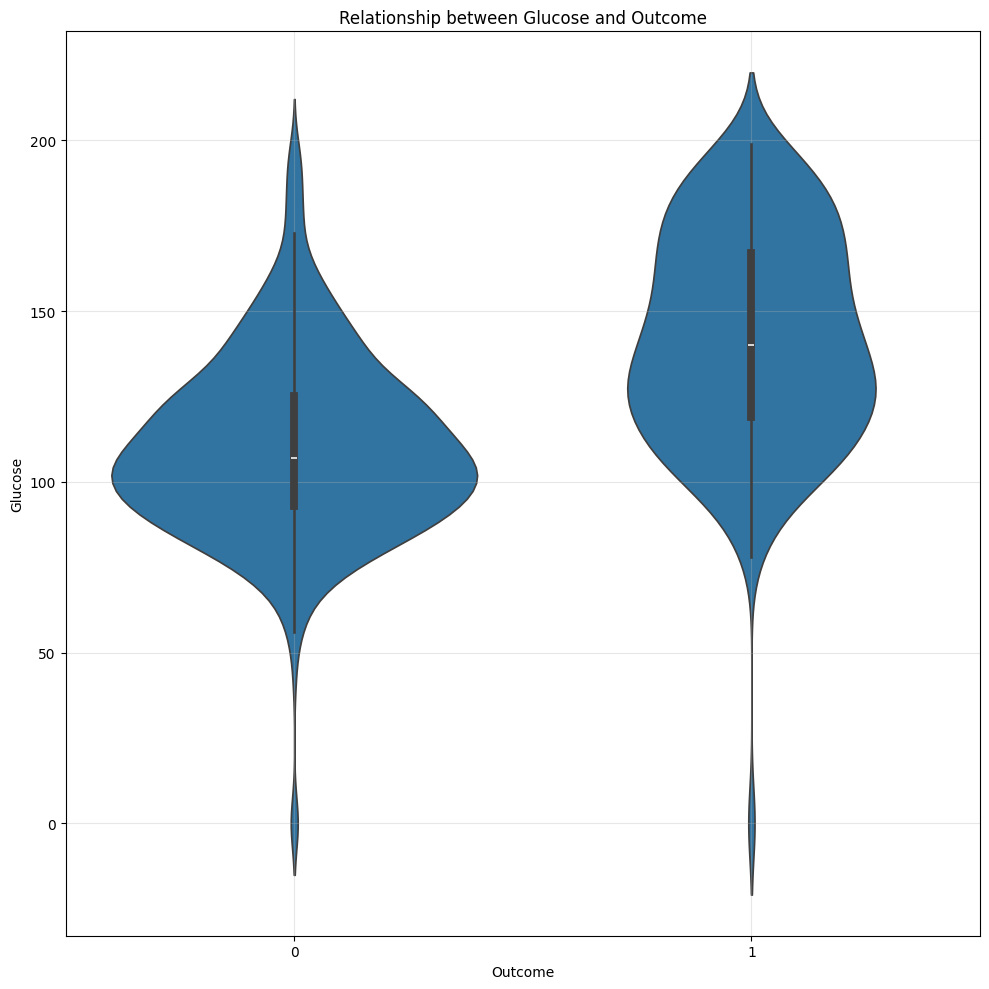

In [ ]:
# what is the relationship between 'Glucose' and 'Outcome'
plt.figure(figsize=(10, 10))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Relationship between Glucose and Outcome')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

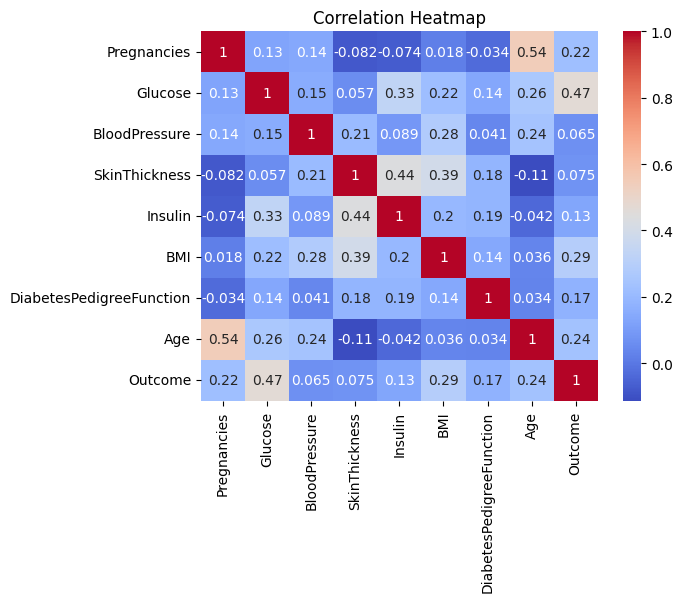

In [ ]:
# Values Relationship with Outcome
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Performing Mutual Information Analysis
mi_scores = mutual_info_classif(df.drop('Outcome', axis=1), df['Outcome'])
mi_scores = pd.Series(mi_scores,
                      index=df.drop('Outcome', axis=1).columns).sort_values(
                          ascending=False)
mi_scores

,0
Glucose,0.131522
BMI,0.071440
Pregnancies,0.059249
Age,0.051166
Insulin,0.042163
BloodPressure,0.009037
SkinThickness,0.003768
DiabetesPedigreeFunction,0.003710


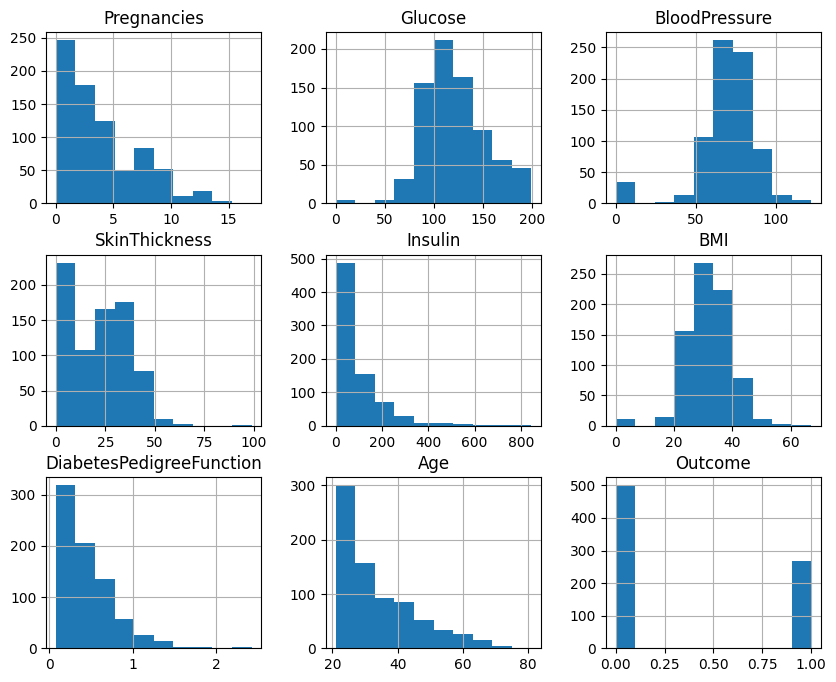

In [ ]:
# 'Glucose' is the single strong predicator
# 'BMI' has significant role in predicting 'Outcome'
df.hist(figsize=(10, 8))
plt.show()

In [ ]:
# Need to fix Skewness for SVM, but not for Decision Tree